<a href="https://colab.research.google.com/github/sabaakram539/Churn_Rate_Analysis/blob/main/Churn_Rate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn_Rate_Analysis

In this project we are going to perform attrition rate analysis om the churn dataset. This telecommunication dataset is taken from the dataminingconsultant.com. Let's dig in.

Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing dataset

In [3]:
churn=pd.read_csv("churn.txt")
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
churn.rename(columns = {'Churn?':'Churn'}, inplace = True)

In [5]:
churn.shape

(3333, 21)

Knowing the dataset

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

## Data Preprocessing

In [7]:
churn.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn             0
dtype: int64

There is no null value.

Dropping duplicated values.

In [8]:
churn=churn.drop_duplicates()

In [9]:
churn.head(2)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.


In [10]:
churn.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

Removing unimportant columns.


> State, Account Length, Area Code and Phone will not be required during the analysis. Let's remove them.





In [11]:
churn=churn.drop(['State','Account Length', 'Area Code', 'Phone'],axis=1)

In [12]:
churn.columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [13]:
churn.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


We observe the following

*   Categorical Variables
1.   Int'l Plan
2.   VMail Message
*   Continuous Variables
1.   VMail Message
2.   Day Mins	
3.   Day Calls
4.   Day Charge	
5.   Eve Mins	
6.   Eve Calls
7.   Eve Charge	
8.   Night Mins	
9.   Night Calls	
10.  Night Charge	
11.  Intl Mins
12.  Intl Calls
13.  Intl Charge
14.  CustServ Calls





Knowing the percentage of the churners.

In [14]:
churn['Churn'].value_counts()*100/len(churn['Churn'])

False.    85.508551
True.     14.491449
Name: Churn, dtype: float64

Text(0.5, 1.02, 'Count of Churn')

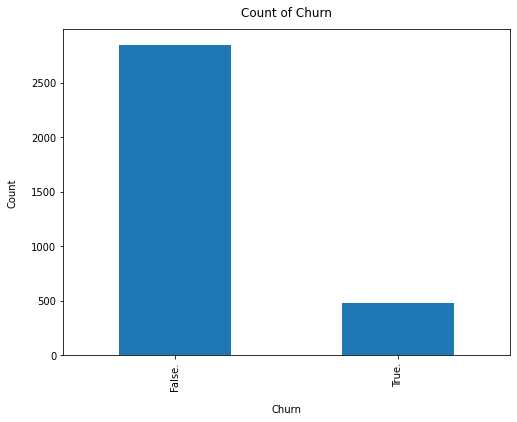

In [15]:
churn['Churn'].value_counts().plot(kind='bar',figsize=(8,6))
plt.xlabel("Churn",labelpad=14)
plt.ylabel("Count",labelpad=14)
plt.title("Count of Churn",y=1.02)

## Dealing with the categorical variables

In [16]:
churn.head(2)

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.


Transforming the categorical variables.

In [17]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [18]:
churn["Int'l Plan"]=le.fit_transform(churn["Int'l Plan"])
churn['VMail Plan']=le.fit_transform(churn["VMail Plan"])
churn["Churn"]=le.fit_transform(churn["Churn"])

In [19]:
churn.head(2)

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


We have No=0, Yes=1, False=0 and True=1.

## Correlation Matrix
Measuring the correlation of the similar attitudes.

In [20]:
churn[['Day Mins', 'Day Calls','Day Charge']].corr()

,Day Mins,Day Calls,Day Charge
Day Mins,1.00000,0.006750,1.000000
Day Calls,0.00675,1.000000,0.006753
Day Charge,1.00000,0.006753,1.000000


We have perfect correlation between Day Minutes and Day Charge. We can remove any one of them to avoid multicollinearlity. We will remove Day Charge.

In [21]:
churn[['Eve Mins', 'Eve Calls', 'Eve Charge']].corr()

,Eve Mins,Eve Calls,Eve Charge
Eve Mins,1.00000,-0.011430,1.000000
Eve Calls,-0.01143,1.000000,-0.011423
Eve Charge,1.00000,-0.011423,1.000000


Again there is perfect correlation between Evening Minutes and Evening Charge. We weill remove Evening Charge.

In [22]:
churn[['Night Mins','Night Calls', 'Night Charge']].corr()

,Night Mins,Night Calls,Night Charge
Night Mins,1.000000,0.011204,0.999999
Night Calls,0.011204,1.000000,0.011188
Night Charge,0.999999,0.011188,1.000000


There is nearly perfect correlation between Night Minutes and Night Charge. We will remove Night Charge to avoid the multicollinearity.

In [23]:
churn[['Intl Mins', 'Intl Calls', 'Intl Charge']].corr()

,Intl Mins,Intl Calls,Intl Charge
Intl Mins,1.000000,0.032304,0.999993
Intl Calls,0.032304,1.000000,0.032372
Intl Charge,0.999993,0.032372,1.000000


Again there is nearly perfect correlation between International Minutes and InternaTIONAL charge. In order to avoid the multicollinearlity, we will remove the International Charge Variable.

Removing the correlated variables in order to avoid the multicollinearlty.

In [24]:
churn.columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [25]:
churn.drop(["Day Charge","Eve Charge","Night Charge","Intl Charge"],axis=1,inplace=True)

In [26]:
churn.columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Eve Mins', 'Eve Calls', 'Night Mins', 'Night Calls', 'Intl Mins',
       'Intl Calls', 'CustServ Calls', 'Churn'],
      dtype='object')

In [27]:
churn.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn
0,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


## Univariate Analysis

In [28]:
churn.columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Eve Mins', 'Eve Calls', 'Night Mins', 'Night Calls', 'Intl Mins',
       'Intl Calls', 'CustServ Calls', 'Churn'],
      dtype='object')

In [29]:
churn[['VMail Message', 'Day Mins', 'Day Calls','Eve Mins', 'Eve Calls', 'Night Mins','Night Calls', 'Intl Mins', 'Intl Calls','CustServ Calls']].min()

VMail Message      0.0
Day Mins           0.0
Day Calls          0.0
Eve Mins           0.0
Eve Calls          0.0
Night Mins        23.2
Night Calls       33.0
Intl Mins          0.0
Intl Calls         0.0
CustServ Calls     0.0
dtype: float64

In [30]:
churn[['VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls',  'Night Mins','Night Calls',  'Intl Mins', 'Intl Calls', 'CustServ Calls']].max()

VMail Message      51.0
Day Mins          350.8
Day Calls         165.0
Eve Mins          363.7
Eve Calls         170.0
Night Mins        395.0
Night Calls       175.0
Intl Mins          20.0
Intl Calls         20.0
CustServ Calls      9.0
dtype: float64

In [31]:
churn[['VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls',  'Night Mins','Night Calls',  'Intl Mins', 'Intl Calls','CustServ Calls']].mean()

VMail Message       8.099010
Day Mins          179.775098
Day Calls         100.435644
Eve Mins          200.980348
Eve Calls         100.114311
Night Mins        200.872037
Night Calls       100.107711
Intl Mins          10.237294
Intl Calls          4.479448
CustServ Calls      1.562856
dtype: float64

In [32]:
import seaborn as sns

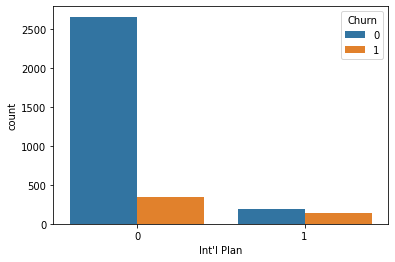

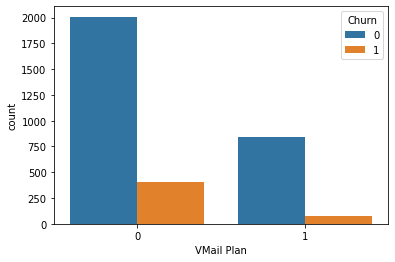

In [33]:
for i, predictor in enumerate(churn[["Int'l Plan","VMail Plan"]]):
  plt.figure(i)
  sns.countplot(data=churn,x=predictor,hue="Churn")

In [34]:
pd.crosstab(churn['Churn'],churn["Int'l Plan"])

Int'l Plan,0,1
Churn,,
0,2664,186
1,346,137


In [35]:
pd.crosstab(churn["Churn"],churn["VMail Plan"])

VMail Plan,0,1
Churn,,
0,2008,842
1,403,80


In [36]:
churn.columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Eve Mins', 'Eve Calls', 'Night Mins', 'Night Calls', 'Intl Mins',
       'Intl Calls', 'CustServ Calls', 'Churn'],
      dtype='object')

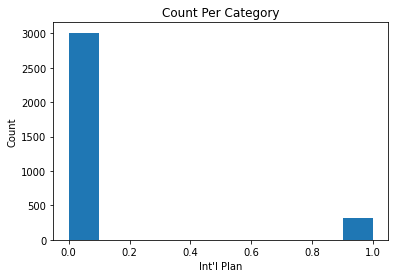

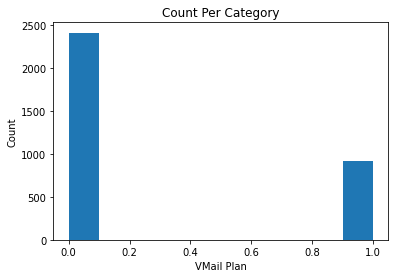

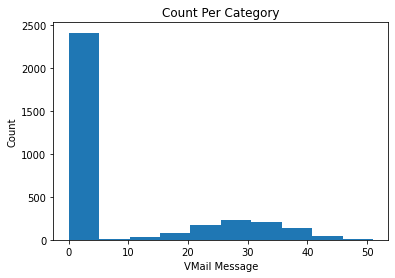

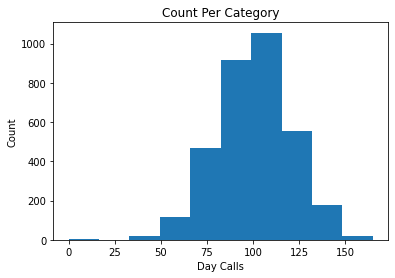

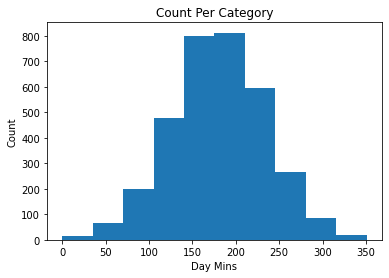

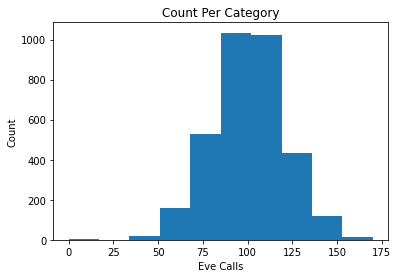

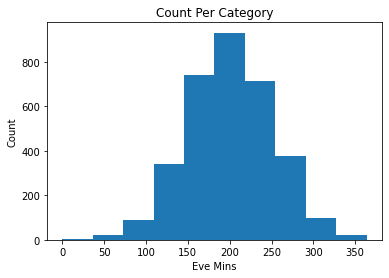

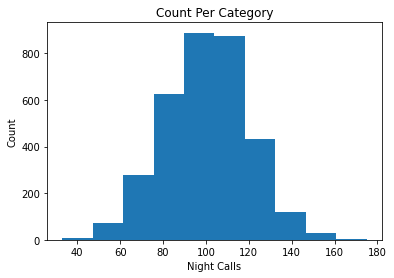

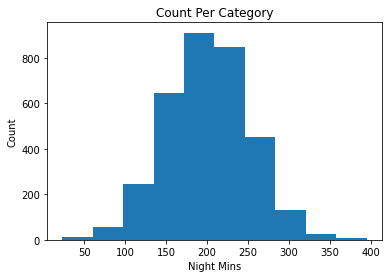

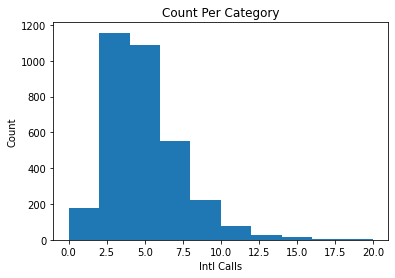

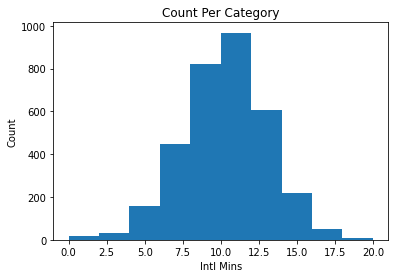

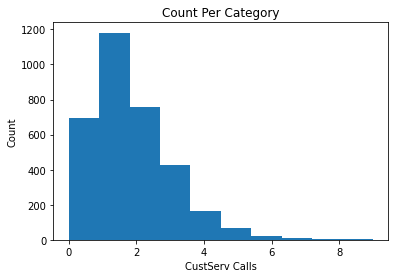

In [64]:
for i,j in enumerate(churn[["Int'l Plan", 'VMail Plan', 'VMail Message','Day Calls'
,'Day Mins','Eve Calls','Eve Mins','Night Calls','Night Mins','Intl Calls','Intl Mins', 'CustServ Calls']]):
  plt.figure(i)
  plt.xlabel(j)
  plt.ylabel("Count")
  plt.title("Count Per Category")
  plt.hist(churn[j])

## Bivariate Analysis

In [67]:
from scipy.stats import mannwhitneyu

In [68]:
churn_yes=churn[churn['Churn']==1]
churn_no=churn[churn['Churn']==0]

In [69]:
churn.columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Eve Mins', 'Eve Calls', 'Night Mins', 'Night Calls', 'Intl Mins',
       'Intl Calls', 'CustServ Calls', 'Churn'],
      dtype='object')

In [71]:
stats,p=mannwhitneyu(churn_yes['VMail Message'],churn_no['VMail Message'])
print(stats,p)

603415.5 1.8524407051806926e-08


In [73]:
stats,p=mannwhitneyu(churn_yes['Day Calls'],churn_no['Day Calls'])
print(stats,p)

658577.0 0.06441369183499285


In [74]:
stats,p=mannwhitneyu(churn_yes['Day Mins'],churn_no['Day Mins'])
print(stats,p)

495604.0 3.357526710429974e-23


In [75]:
stats,p=mannwhitneyu(churn_yes['Eve Calls'],churn_no['Eve Calls'])
print(stats,p)

678592.5 0.31024966728067604


In [76]:
stats,p=mannwhitneyu(churn_yes['Eve Mins'],churn_no['Eve Mins'])
print(stats,p)

588267.5 1.5788383510406194e-07


In [103]:
stats,p=mannwhitneyu(churn_yes['Night Calls'],churn_no['Night Calls'])
print(stats,p)

682976.5 0.3932176126454748


In [104]:
stats,p=mannwhitneyu(churn_yes['Night Mins'],churn_no['Night Mins'])
print(stats,p)

649507.0 0.02372017265732756


In [78]:
stats,p=mannwhitneyu(churn_yes['Intl Calls'],churn_no['Intl Mins'])
print(stats,p)

87423.0 1.2456550908169285e-207


In [80]:
stats,p=mannwhitneyu(churn_yes['CustServ Calls'],churn_no['CustServ Calls'])
print(stats,p)

539322.5 1.5320123451764337e-15


From the above tests, we observe that all the variables have the P-Value less than 0.05 except for Day Calls and Evening Calls. Therefore these two variables i.e. Day Calls, Evening Calls and Night Calls are not importanrt in predicting Churn of the customers.

In [88]:
from scipy.stats import chi2_contingency

In [89]:
chitable=pd.crosstab(churn['Churn'],churn["Int'l Plan"])
chitable

Int'l Plan,0,1
Churn,,
0,2664,186
1,346,137


In [90]:
stats,p,dof,expected=chi2_contingency(chitable)
print(stats,p)

222.5657566499376 2.4931077033159556e-50


In [91]:
chitable=pd.crosstab(churn['Churn'],churn['VMail Plan'])
chitable

VMail Plan,0,1
Churn,,
0,2008,842
1,403,80


In [92]:
stats,p,dof,expected=chi2_contingency(chitable)
print(stats,p)

34.13166001075673 5.15063965903898e-09


From the above chi2_contingency test we get that both the variable are important in predicting the churn.

## Preparing the Final Model

In [95]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [93]:
churn.columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Eve Mins', 'Eve Calls', 'Night Mins', 'Night Calls', 'Intl Mins',
       'Intl Calls', 'CustServ Calls', 'Churn'],
      dtype='object')

In [105]:
y=churn["Churn"]
x=churn[["Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins','Intl Calls', 'CustServ Calls']]
x1=sm.add_constant(x)

In [106]:
logistic=sm.Logit(y,x1)
result=logistic.fit()

Optimization terminated successfully.
         Current function value: 0.324281
         Iterations 7


In [107]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3323
Method:                           MLE   Df Model:                            9
Date:                Thu, 26 Aug 2021   Pseudo R-squ.:                  0.2163
Time:                        12:21:12   Log-Likelihood:                -1080.8
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                1.102e-122
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.0662      0.516    -15.637      0.000      -9.077      -7.055
Int'l Plan         2.0403      0.145     14.047      0.000       1.756       2.325
VMail Plan        -2.0030      0.572     -3.500      0.000      -3.125      -0.881
VMail Message      0.0353      0.018      1.963      0.050    4.84e-05       0.070
Day Mins           0.0130      0.001     12.022      0.000       0.011       0.015
Eve Mins           0.0072      0.001      6.290      0.000       0.005       0.009
Night Mins         0.0037      0.001      3.348      0.001       0.002       0.006
Intl Mins          0.0880      0.020      4.319      0.000       0.048       0.128
Intl Calls        -0.0922      0.025     -3.688      0.000      -0.141      -0.043
CustServ Calls     0.5122      0.039     13.087      0.000       0.436       0.589
==================================================================================
"""